# **About the Data**

**Dataset Source & Link:**  Kaggle, Indicators of Heart Diseases\
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

**Time Coverage:** 2022 CDC Annual Health Survey

**Shape (row x columns):** 246022 x 50

**Units:**
- BMI (Kg/m^2)
- HeightInMeters (m)
- WeightInKilograms (Kg)
- SleepHours (Hours)
- PhysicalHealthDays, MentalHealthDays (number of days, 0-30)

**Column Directory:**
- Demographics ('State', 'Sex' etc)
- General Health ('PhysicalHealthDays', 'MentalHealthDays', etc)
- Medical History ('HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes')
- Health Behaviour ('PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'HighRiskLastYear')
- Vaccination ('FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap')
- Dental Records ('RemovedTeeth')
- Derived Columns ('bmi_category', 'poor_physical_health', 'poor_mental_health', 'obese_bmi', 'poor_sleep', 'smoker_simple', 'composite_risk', 'sleep_bucket', 'high_bmi_or_poor_health', 'sleep_health_category')

**Missingness/Outlier Snapshot:**
- The current dataset (`heart_2022_no_nans.csv`) has no missing values.
- Outliers were filtered for the BMI regression plot (BMI between 15 and 80).

**Known Quirks:**
- 'AgeCategory' is grouped into categories instead of raw ages
- Self reported data (height, weight, etc)  may be inaccurate

**Derived Columns (What changed vs. earlier):**
- bmi_category: groups BMI into different categories (Underweight, Normal, Overweight, Obese) for more interpretable visuals.
- poor_physical_health: boolean mask for PhysicalHealthDays >= 15.
- poor_mental_health: boolean mask for MentalHealthDays >= 15.
- obese_bmi: boolean mask for BMI >= 30.
- poor_sleep: boolean mask for SleepHours <= 6.
- smoker_simple: simplified categories for SmokerStatus.
- composite_risk: a score based on multiple health indicators.
- sleep_bucket: categorical bucketing of SleepHours.
- high_bmi_or_poor_health: boolean mask for high BMI or poor physical/mental health (added for correlation/pairplot).
- sleep_health_category: categorical bucketing of SleepHours into 'short_sleep', 'normal_sleep', and 'long_sleep' (added for correlation/pairplot).

In [ ]:
# PROFESSOR'S SOLUTION
# !curl -L -o heart_disease.zip \
#   https://www.kaggle.com/api/v1/datasets/download/kamilpytlak/personal-key-indicators-of-heart-disease


# !unzip -o heart_disease.zip -d ./heart_disease_data

# #!ls heart_disease_data/2022/heart_2022_no_nans

import pandas as pd
hp = pd.read_csv("heart_2022_no_nans.csv")


hp.info()
hp.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
hp.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
hp.columns = [c.strip().lower().replace(" ", "_") for c in hp.columns]

# normalize Yes/No columns to 1/0
yes_no_map = {"Yes": 1, "No": 0}
for col in hp.select_dtypes(include="object").columns:
    if set(hp[col].unique()) <= set(yes_no_map.keys()):
        hp[col] = hp[col].map(yes_no_map)

# check balance of target column (assuming "HadHeartAttack")
if "HadHeartAttack".lower() in hp.columns:
    target_col = "hadheartattack"
    print("Target distribution:")
    print(hp[target_col].value_counts())



hp.describe()



Target distribution:
hadheartattack
0    232587
1     13435
Name: count, dtype: int64


,physicalhealthdays,mentalhealthdays,physicalactivities,sleephours,hadheartattack,hadangina,hadstroke,hadasthma,hadskincancer,hadcopd,...,difficultyerrands,chestscan,heightinmeters,weightinkilograms,bmi,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,highrisklastyear
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,0.777646,7.021331,0.054609,0.060779,0.041102,0.148479,0.085444,0.077204,...,0.066596,0.423539,1.705150,83.615179,28.668136,0.549979,0.343473,0.533269,0.406029,0.042988
std,8.405844,8.102687,0.415829,1.440681,0.227216,0.238925,0.198527,0.355574,0.279541,0.266916,...,0.249321,0.494120,0.106654,21.323156,6.513973,0.497497,0.474869,0.498893,0.491091,0.202831
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.910000,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.630000,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.700000,81.650000,27.460000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,4.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.780000,95.250000,31.890000,1.000000,1.000000,1.000000,1.000000,0.000000
max,30.000000,30.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.410000,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#B.1 Vectorized boolean mask
if "physicalhealthdays" in hp.columns:
  hp["poor_physical_health"] = (hp["physicalhealthdays"] >= 15)
if "mentalhealthdays" in hp.columns:
  hp["poor_mental_health"] = (hp["mentalhealthdays"] >= 15)
if "bmi" in hp.columns:
  hp["obese_bmi"] = (hp["bmi"] >= 30)
if "sleephours" in hp.columns:
  hp["poor_sleep"] = (hp["sleephours"] <= 6)

In [ ]:
#B.2 Single Column transformation using map or Series.apply
if "smokerstatus" in hp.columns and hp['smokerstatus'].dtype == "object":
  smap = {
      "Current smoker - now smokes evryday" : "current smoker",
      "Current smoker - now smokes some days" : "current smoker",
      "Former smoker" : "former",
      "Never smoked" : "never"
  }
hp["smoker_simple"] = hp["smokerstatus"].map(smap).fillna(hp["smokerstatus"])


In [ ]:
#B.3 multi column logic
def composite_risk(row):
  score = 0
  for col in ["obese_bmi", "poor_physical_health", "poor_mental_health", "poor_sleep"]:
    if col in row and bool(row[col]):
      score += 1
  for col in ['hadheartattack', 'hadangina', 'hadstroke']:
    if col in row and row[col] in (1,1.0, True):
      score += 1
  return score

hp['composite_risk'] = hp.apply(composite_risk, axis=1)

In [ ]:
#B.4 categorical bucketing
def sleep_bucket(x):
  if pd.isna(x): return "missing"
  if x < 6: return "short"
  if x <= 8: return "normal"
  return "long"

if "sleephours" in hp.columns:
  hp["sleep_bucket"] = hp["sleephours"].map(sleep_bucket)

def bmi_bucket(x):
  if pd.isna(x): return "missing"
  if x < 18.5: return "underweight"
  if x < 25: return "normal"
  if x < 30: return "overweight"
  return "obese"

if "bmi" in hp.columns:
  hp["bmi_bucket"] = hp["bmi"].map(bmi_bucket)

In [ ]:
#B.5 Missing data handling
hp_imputed = hp.copy()
for c in hp_imputed.columns:
  if pd.api.types.is_numeric_dtype(hp_imputed[c]):
    hp_imputed[c] = hp_imputed[c].fillna(hp_imputed[c].median())
  elif hp_imputed[c].dtype == "object":
    hp_imputed[c] = hp_imputed[c].fillna("unknown")

hp_imputed.head()

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,highrisklastyear,covidpos,poor_physical_health,poor_mental_health,obese_bmi,poor_sleep,smoker_simple,composite_risk,sleep_bucket,bmi_bucket
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,0,No,False,False,False,False,former,0,long,overweight
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,0,No,False,False,True,True,former,2,normal,obese
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,0,Yes,False,False,True,False,former,1,normal,obese
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,0,Yes,False,False,True,False,never,1,long,obese
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,...,0,No,False,True,True,True,never,3,short,obese


In [ ]:
#C.1 value_counts() with interpretation
y = "cvd_any" if "cvd_any" in hp_imputed.columns else target_col
if y and y in hp_imputed.columns:
  vc = hp_imputed[y].value_counts(dropna=False)
  print(f"{y} counts: \n{vc}")
  print(f"\nPrevalence: {(hp_imputed[y].mean()*100):.2f}%")

hadheartattack counts: 
hadheartattack
0    232587
1     13435
Name: count, dtype: int64

Prevalence: 5.46%


In [ ]:
#C.2.a GroupBy
if {"agecategory",y}.issubset(hp_imputed.columns):
  g_age = (hp_imputed.groupby("agecategory", dropna=False)
          .agg(n=(y,"size"), prevalence=(y,"mean"))
          .assign(prevalence_pct=lambda t: (t["prevalence"]*100).round(2))
          .sort_values(["prevalence","n"], ascending=[False,False])
          .reset_index())
  display(g_age)

,agecategory,n,prevalence,prevalence_pct
0,Age 80 or older,17816,0.136170,13.62
1,Age 75 to 79,18136,0.113862,11.39
2,Age 70 to 74,25739,0.093555,9.36
3,Age 65 to 69,28557,0.075463,7.55
4,Age 60 to 64,26720,0.058945,5.89
5,Age 55 to 59,22224,0.050036,5.00
6,Age 50 to 54,19913,0.035304,3.53
7,Age 45 to 49,16753,0.025070,2.51
8,Age 40 to 44,16973,0.013433,1.34
9,Age 35 to 39,15614,0.009991,1.00


In [ ]:
#C.2.b Groupby
need = {"sleep_bucket","sex", y}
if need.issubset(hp_imputed.columns):
  g_sleep_sex = (hp_imputed.groupby(["sleep_bucket","sex"], dropna=False)
                  .agg(n=(y,"size"), prevalence=(y,"mean"))
                  .assign(prevalence_pct=lambda t: (t["prevalence"]*100).round(2))
                  .sort_values(["prevalence","n"], ascending=[False,False])
                  .reset_index())
  display(g_sleep_sex)

,sleep_bucket,sex,n,prevalence,prevalence_pct
0,long,Male,8907,0.122600,12.26
1,short,Male,12162,0.099161,9.92
2,short,Female,13654,0.068258,6.83
3,normal,Male,97142,0.063876,6.39
4,long,Female,10944,0.057840,5.78
5,normal,Female,103213,0.032622,3.26


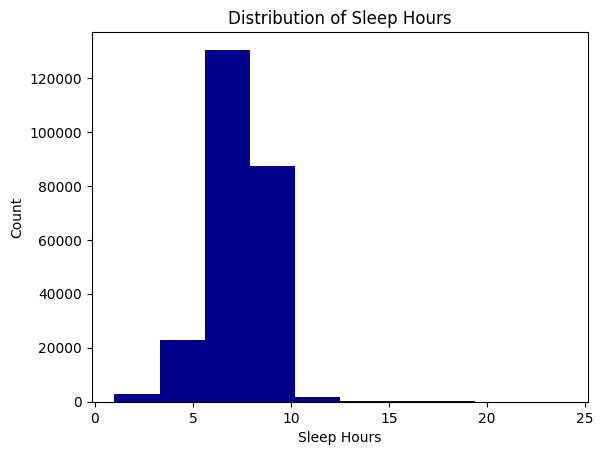

In [ ]:
import matplotlib.pyplot as plt

df = hp_imputed

# D1 histogram #1 (distribution of a meaningful numeric column)
plt.hist(df['sleephours'], bins=10, color='darkblue')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.title('Distribution of Sleep Hours')
plt.show()


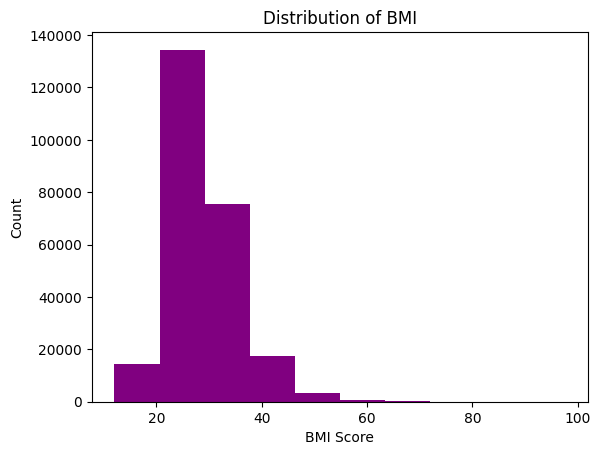

In [ ]:
# D1 histogram #2

plt.hist(df['bmi'], bins=10, color='purple')
plt.xlabel('BMI Score')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

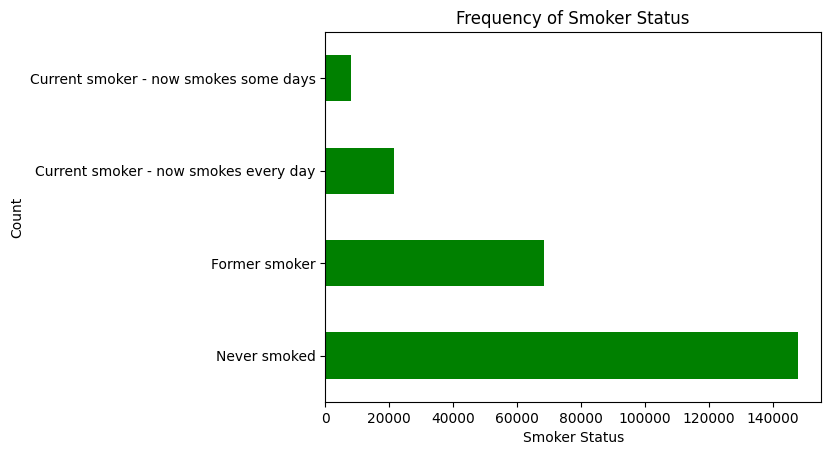

In [ ]:
# D2 frequency/compare chart #1

df['smokerstatus'].value_counts().plot(kind='barh', color='green')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Frequency of Smoker Status')
plt.show()

Text(0.5, 1.0, 'Frequency of Heart Attack by Sex')

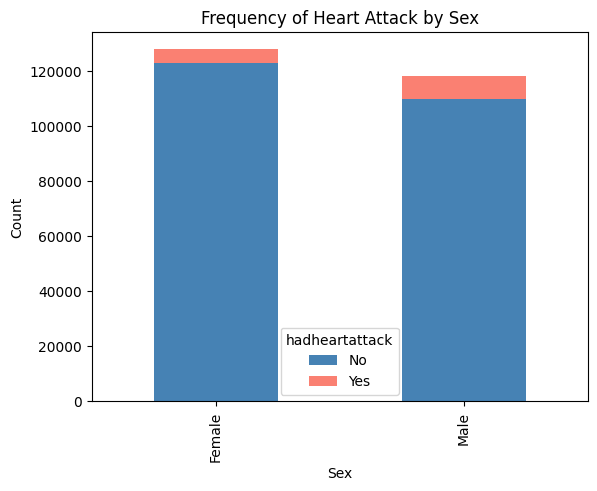

In [ ]:
# D2 frequency/compare chart #2
df.groupby('sex')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='bar', stacked=True, color=['steelblue', 'salmon'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Frequency of Heart Attack by Sex')

Text(0.5, 1.0, 'Frequency of Heart Attack by Age Category')

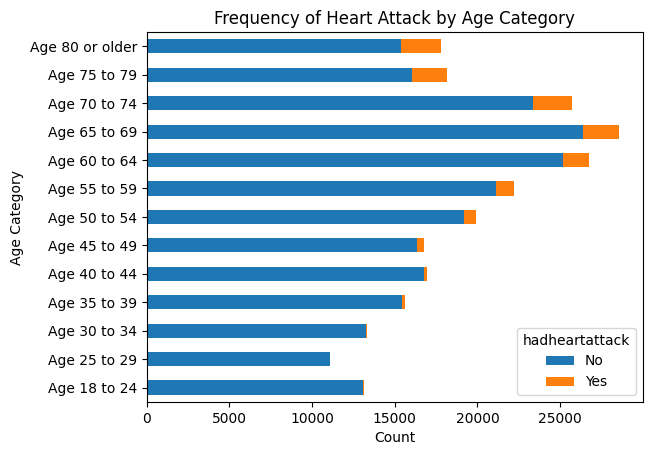

In [ ]:
# D2 frequency/compare chart #3
df.groupby('agecategory')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Age Category')
plt.title('Frequency of Heart Attack by Age Category')

Text(0.5, 1.0, 'Frequency of Heart Attack based on Ethnicity')

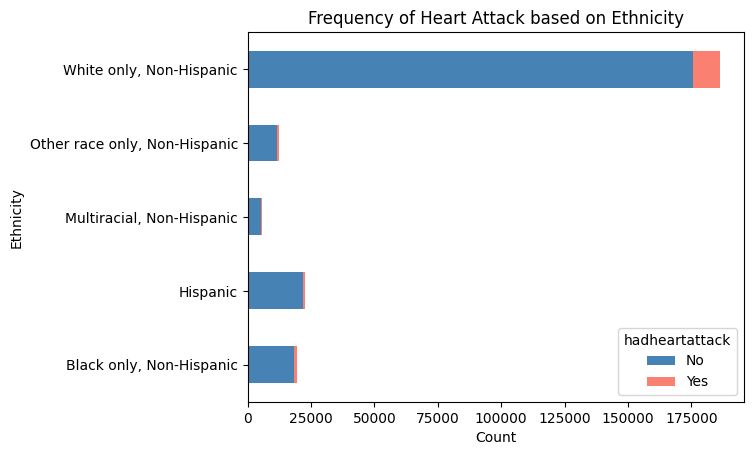

In [ ]:
# D2 frequency/compare chart #4
df.groupby('raceethnicitycategory')['hadheartattack'].value_counts().unstack().rename(
    columns={0: "No", 1: "Yes"}).plot(kind='barh', stacked=True, color=['steelblue', 'salmon'])
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Frequency of Heart Attack based on Ethnicity')

In [ ]:
# PA3 B
def bmi_range(bmi):
  if bmi < 18.5:
    return "Underweight"
  elif 18.5 <= bmi < 25:
    return "Normal"
  elif 25 <= bmi < 30:
    return "Overweight"
  else:
    return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_range)

The BMI range transformation is necessary for clarity and comparability. It will allow us to compare heart attack frequency across BMI groups, which can help reveal underlying patterns.

Text(0.5, 1.0, 'Heart Attack by BMI')

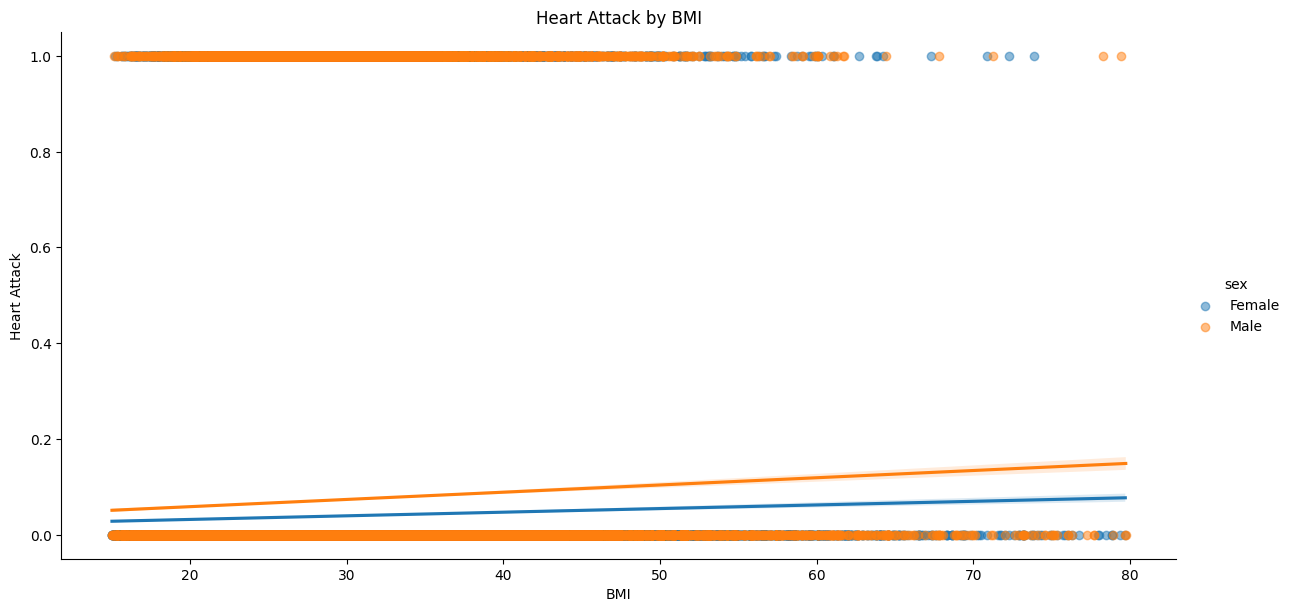

In [ ]:
# PA3 Regression View
import seaborn as sns

df_filtered = df[(df['bmi'] > 15) & (df['bmi']<= 80)]

# Logistic regression view #1
sns.lmplot(
    data=df_filtered,
    x='bmi',
    y='hadheartattack',
    hue='sex',
    ci=95,
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.5},
)

plt.xlabel('BMI')
plt.ylabel('Heart Attack')
plt.title('Heart Attack by BMI')




In the regression view above, we used ci=95 so there would be a shaded band around the regression line indicating the 95% confidence interval. We did not use order because we are using the numerical BMI values and not the BMI categories. We filtered out the outliers in the BMI that are less than 15 and equal to or greater than 80.

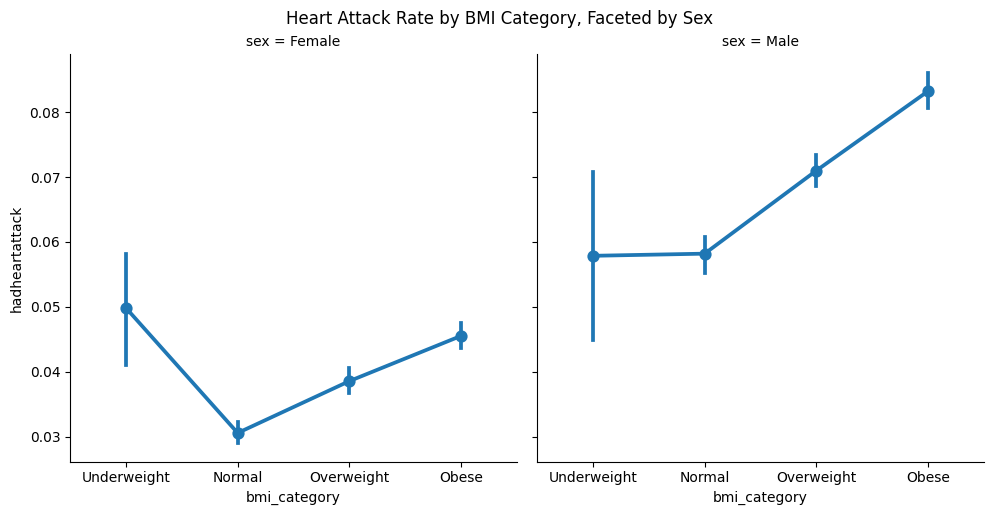

In [ ]:
# PA3 Small multiples
import numpy as np
g = sns.catplot(
    data=df_filtered,
    x="bmi_category", y="hadheartattack",
    col="sex", kind="point", #using point for means
    estimator=np.mean,
    errorbar=("ci", 95),
    order=["Underweight", "Normal", "Overweight", "Obese"],
    height=5, aspect=1,
    sharex=True, sharey=True
)

g.fig.suptitle("Heart Attack Rate by BMI Category, Faceted by Sex", y=1.02)
plt.show()


In the categorical plot, females show a slight increase in heart attack rate across BMI groups, while males remain flat at lower BMI but rise noticeably in overweight and obese categories; error bars represent 95% confidence intervals around the mean rates.

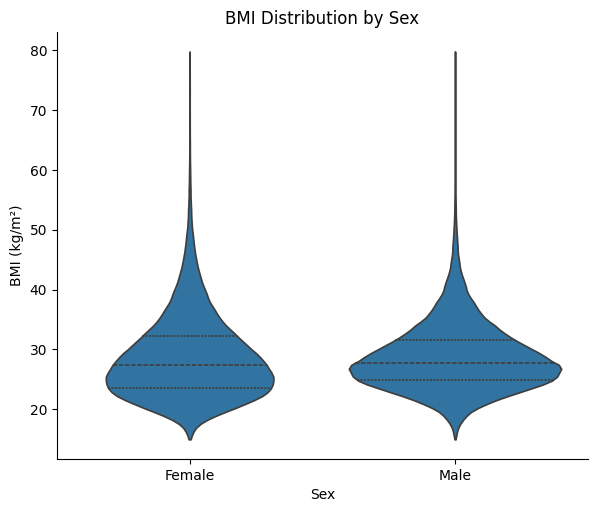

In [ ]:
# PA3 catgegorical distribution

sns.catplot(
    data=df_filtered,
    x="sex", y="bmi",
    kind="violin", cut=0, inner="quartile",
    height=5, aspect=1.2
).set(
    xlabel="Sex",
    ylabel="BMI (kg/m²)",
    title="BMI Distribution by Sex"
)
plt.show()



The violin plot shows that both males and females have similar BMI distributions centered around the mid-20s, with most values falling between roughly 20 and 35 kg/m^2 and a few higher outliers, indicating comparable overall body composition patterns across sexes.

In [ ]:
# PA3 Statistical check

from scipy.stats import linregress

# Run linear regression: BMI → heart attack (0/1)
lr = linregress(df_filtered["bmi"], df_filtered["hadheartattack"])

print(f"Slope: {lr.slope:.4f}")
print(f"Intercept: {lr.intercept:.4f}")
print(f"P-value: {lr.pvalue:.4f}")
print(f"R^2: {lr.rvalue**2:.3f}")


Slope: 0.0011
Intercept: 0.0239
P-value: 0.0000
R^2: 0.001


The regression slope (0.0011, p<0.001) indicates a very small positive association between BMI and heart-attack occurrence. However, the R^2 value (0.001) shows that BMI explains almost none of the variance in heart-attack outcomes, suggesting that other factors are far more important predictors

In [ ]:
# B. vectorized boolean mask for correlation/pairplot
# this column combines high BMI and poor physical/mental health into a single boolean, which simplifies analysis and visualization of potential correlations with other health indicators.
if all(col in hp for col in ["obese_bmi", "poor_physical_health", "poor_mental_health"]):
  hp["high_bmi_or_poor_health"] = hp["obese_bmi"] | hp["poor_physical_health"] | hp["poor_mental_health"]

# B. categorical bucketing for correlation/pairplot
# bucketing sleep hours into categories simplifies the analysis of sleep health distribution and its potential relationship with other categorical or numerical variables in visualizations like pairplots.
def simple_sleep_bucket(x):
  if pd.isna(x): return "missing"
  if x < 7: return "short_sleep"
  if x <= 9: return "normal_sleep"
  return "long_sleep"

if "sleephours" in hp.columns:
  hp["sleep_health_category"] = hp["sleephours"].map(simple_sleep_bucket)

I have added the derived columns `high_bmi_or_poor_health` and `sleep_health_category`. These should be helpful for the correlation heatmap and pairplot visualizations.

In [ ]:
# Verify the new columns
display(hp[['high_bmi_or_poor_health', 'sleep_health_category']].head())

,high_bmi_or_poor_health,sleep_health_category
0,False,normal_sleep
1,True,short_sleep
2,True,normal_sleep
3,True,normal_sleep
4,True,short_sleep


In [ ]:
# C. Structure Figures: Correlation block (clustered corr heatmap) and a pairplot focus panel.

# First convert relevant 'Yes'/'No' columns to numerical for correlation plot
yes_no_map = {"Yes": 1, "No": 0}
correlation_cols_to_convert = ['hadheartattack', 'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer',
                               'hadcopd', 'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
                               'haddiabetes']

for col in correlation_cols_to_convert:
    if col in hp.columns and hp[col].dtype == 'object':
        hp[col] = hp[col].map(yes_no_map)

<Figure size 1200x1000 with 0 Axes>

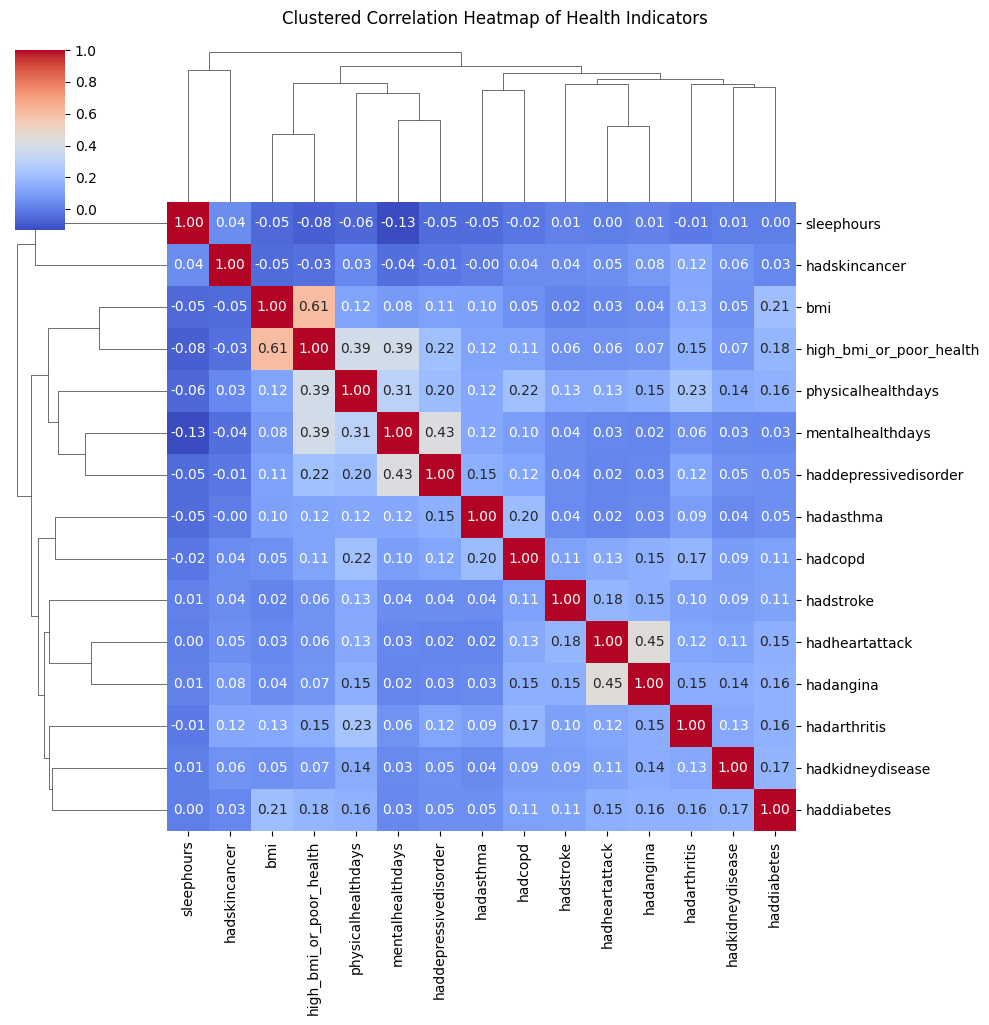

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all relevant columns for correlation analysis
correlation_cols = ['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi',
                    'hadheartattack', 'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer',
                    'hadcopd', 'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
                    'haddiabetes', 'high_bmi_or_poor_health']

correlation_matrix = hp[correlation_cols].corr()

# Plot clustered heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle('Clustered Correlation Heatmap of Health Indicators', y=1.02)
plt.show()

**Correlation Heatmap Takeaway:** This clustered heatmap shows that most health indicators have weak correlations, with only a few moderate positive relationships—such as between BMI and high_bmi_or_poor_health—suggesting that while some conditions co-occur, many health metrics remain relatively independent of each other.

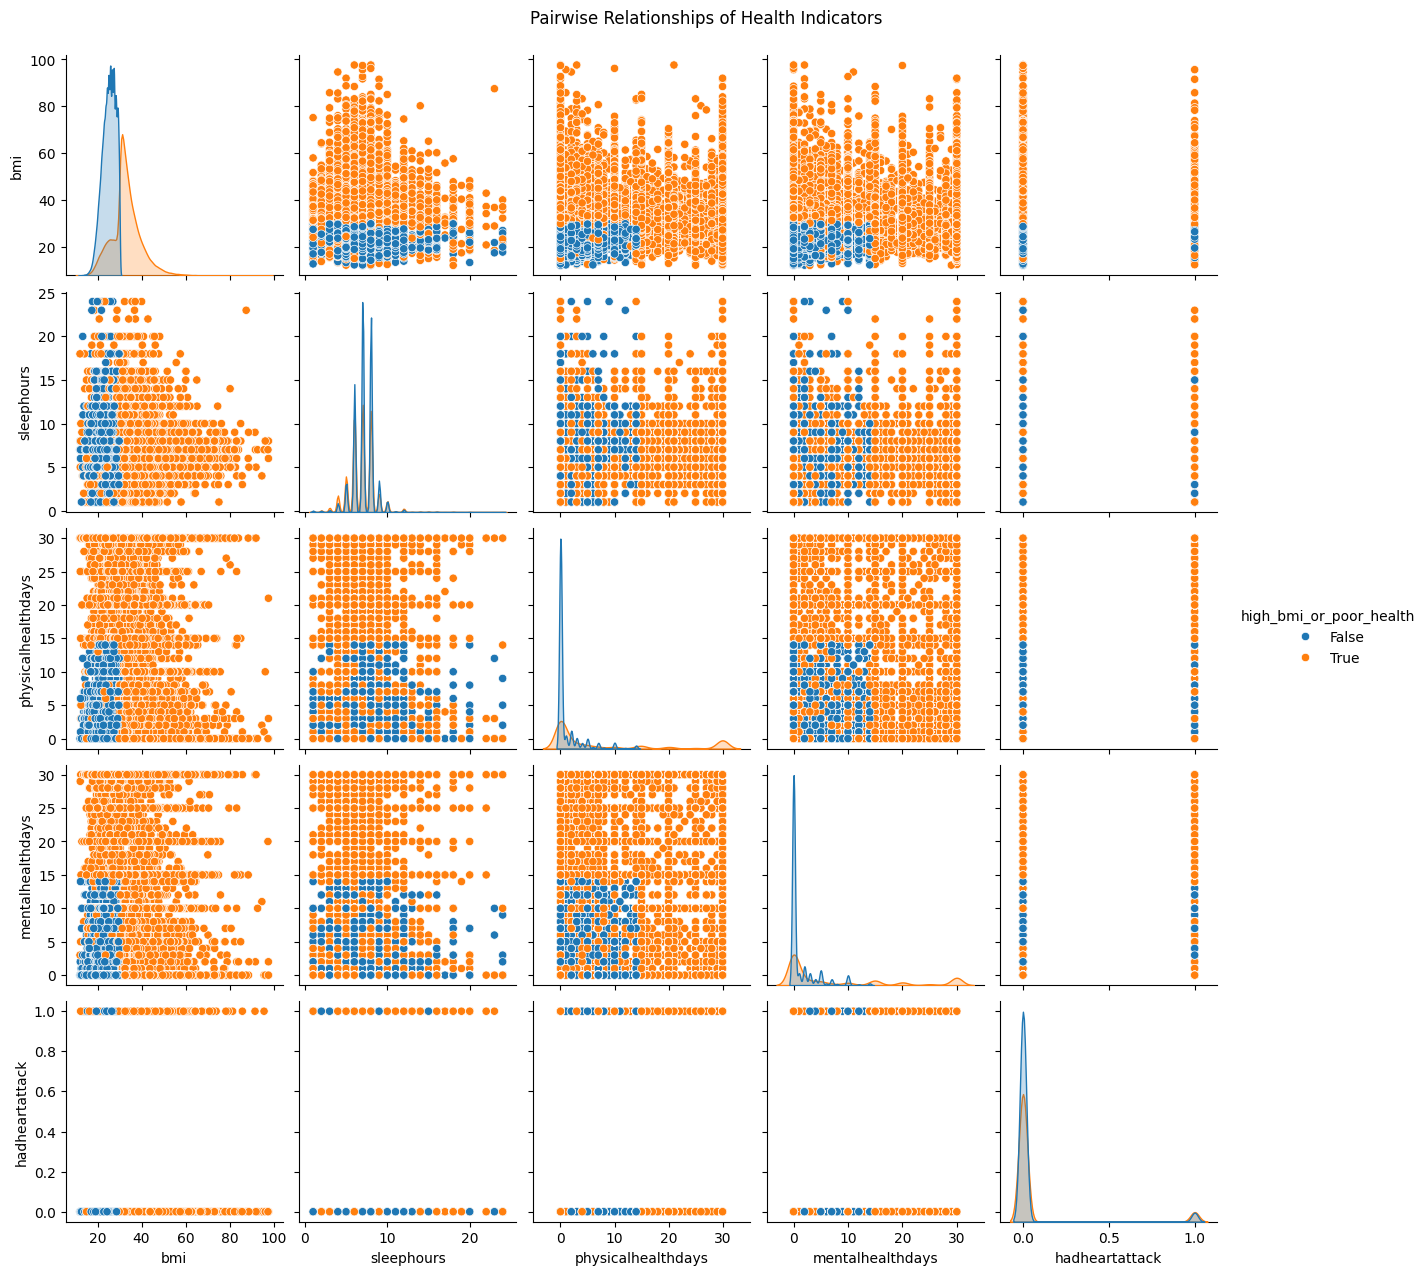

In [ ]:
# Pairplot Focus Panel

# Select a subset of columns for the pairplot, including the new derived columns
pairplot_cols = ['bmi', 'sleephours', 'physicalhealthdays', 'mentalhealthdays',
                 'hadheartattack', 'high_bmi_or_poor_health', 'sleep_health_category']

# Create a pairplot
sns.pairplot(hp[pairplot_cols], hue='high_bmi_or_poor_health', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Health Indicators', y=1.02)
plt.show()

**Pairplot Focus Panel Takeaway:** The pairplot shows that individuals with high BMI or poor health (orange) tend to report more physical and mental health issues and slightly fewer sleep hours, suggesting a visible clustering of poor health outcomes among those with higher BMI levels.

In [ ]:
# Light Quantification: Correlation with high_bmi_or_poor_health

# Select relevant numerical columns and the derived column
quantification_cols= ['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi',
                       'hadheartattack', 'hadangina', 'hadstroke',
                       'high_bmi_or_poor_health']

# Calculate correlations with 'high_bmi_or_poor_health'
correlations_with_derived = hp[quantification_cols].corr()['high_bmi_or_poor_health'].drop('high_bmi_or_poor_health')

print("Correlation with high_bmi_or_poor_health:")
display(correlations_with_derived.sort_values(ascending=False))

Correlation with high_bmi_or_poor_health:


,high_bmi_or_poor_health
bmi,0.607342
physicalhealthdays,0.388580
mentalhealthdays,0.388164
hadangina,0.068520
hadheartattack,0.062715
hadstroke,0.057535
sleephours,-0.080279
